<a href="https://colab.research.google.com/github/norayehia/ECG_signal_-healthcarewithresnet50/blob/main/99acuracyproject16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook

In [ ]:
"""
!pip install zipfile
from  zipfile import ZipFile
import urllib.request
import zipfile
from io import BytesIO
with Zipfile('/content/drive/MyDrive/projectecg/archive.zip','r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/projectecg/nora')

  """

In [ ]:
import cv2
import glob
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import tensorflow.compat.v2 as tf
from keras import backend as k
from keras.applications.mobilenet import MobileNet
from keras.applications import imagenet_utils
import keras.applications
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.keras.utils import Sequence
from tensorflow.python.util.tf_export import keras_export
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from sklearn.metrics import classification_report
import seaborn as sns

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np




import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

extract data from the zip file

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/projectecg/archive.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/projectecg/data")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


https://pypi.org/project/split-folders/

split train into train and validation to use data generator to use less resorce when run model and use validation generator seprate from train to make suffle after split 

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
input_folder = '/content/drive/MyDrive/projectecg/data/ECG_Image_data/train'
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/projectecg/data/ECG_Image_data/trainvalidat2',seed=42,ratio=(.9,.1),group_prefix=None)

Copying files: 99199 files [1:25:39, 19.30 files/s]


get data

In [ ]:
trainpath = "/content/drive/MyDrive/projectecg/data/ECG_Image_data/trainvalidat2/train"
classes = ['F', 'M', 'N', 'Q', 'S', 'V']

train_size = []

for folder_index,folder in enumerate(classes):
  train = glob.glob(trainpath + "/" + folder + "/*")
  train_size.append(len(train))

print(train_size)

[577, 7564, 68138, 5787, 2000, 5210]


In [ ]:
valpath = "/content/drive/MyDrive/projectecg/data/ECG_Image_data/trainvalidat2/val"
classes = ['F', 'M', 'N', 'Q', 'S', 'V']

val_size = []

for folder_index,folder in enumerate(classes):
  val = glob.glob(valpath + "/" + folder + "/*")
  val_size.append(len(val))

print(val_size)

[65, 841, 7571, 644, 223, 579]


In [ ]:
testpath = "/content/drive/MyDrive/projectecg/data/ECG_Image_data/test"
classes = ['F', 'M', 'N', 'Q', 'S', 'V']
test_size = []

for folder_index,folder in enumerate(classes):
  test = glob.glob(testpath + "/" + folder + "/*")
  test_size.append(len(test))

print(test_size)

[161, 2101, 18926, 1608, 556, 1447]


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
preprocess_input= tf.keras.applications.vgg16.preprocess_input

https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
generator = datagen.flow_from_directory(trainpath, target_size=(32, 32), batch_size=32, class_mode='categorical')

Found 89276 images belonging to 6 classes.


In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = val_datagen.flow_from_directory(valpath,
    target_size=(32, 32), batch_size=32, class_mode='categorical') # set as validation data

Found 9923 images belonging to 6 classes.


In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(testpath, target_size=(32, 32), batch_size=32, class_mode='categorical',shuffle=False)

Found 24799 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
#from keras.applications import VGG16
#from keras.preprocessing import image

IMAGE_SIZE = [32, 32]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset
IMAGE_SIZE = [32, 32] .
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (32,32,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(6,activation='softmax')(x)
  # adding the output layer with softmax function as this is a multi label classification problem.
model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:

history = model.fit(generator, validation_data = validation_generator, epochs = 5)

Epoch 1/5
2790/2790 [==============================] - 23003s 8s/step - loss: 0.1094 - accuracy: 0.9830 - val_loss: 0.0056 - val_accuracy: 0.9987
Epoch 2/5
2790/2790 [==============================] - 1386s 497ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0052 - val_accuracy: 0.9986
Epoch 3/5
2790/2790 [==============================] - 1387s 497ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 4/5
2790/2790 [==============================] - 1391s 498ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0116 - val_accuracy: 0.9967
Epoch 5/5
2790/2790 [==============================] - 1387s 497ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9991


In [ ]:
#/content/drive/MyDrive/projectecg/outpvgg
model.save("/content/drive/MyDrive/projectecg/outpvgg")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/projectecg/outpvgg/assets


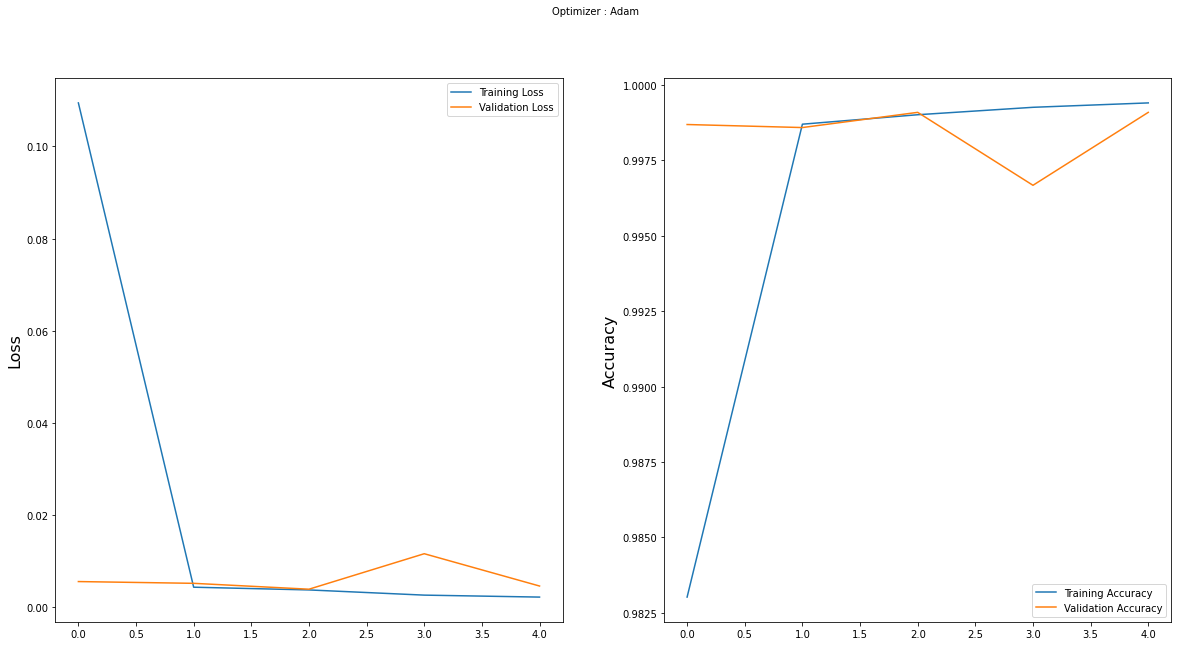

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/my_modelv2")
model = keras.models.load_model('/content/drive/MyDrive/projectecg/outpvgg')

In [ ]:
y_true = test_generator.classes

In [ ]:
y_true

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [ ]:
y_pred_prob = model.predict(test_generator)

In [ ]:
y_pred = tf.argmax(y_pred_prob, axis=-1)

In [ ]:
y_pred = y_pred.numpy()
y_pred

array([0, 2, 0, ..., 5, 5, 5])

In [ ]:
print(classification_report(y_true, y_pred, target_names = classes))

              precision    recall  f1-score   support

           F       1.00      0.98      0.99       161
           M       1.00      0.99      1.00      2101
           N       1.00      1.00      1.00     18926
           Q       1.00      1.00      1.00      1608
           S       1.00      1.00      1.00       556
           V       0.99      1.00      0.99      1447

    accuracy                           1.00     24799
   macro avg       1.00      1.00      1.00     24799
weighted avg       1.00      1.00      1.00     24799



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[  158,     0,     3,     0,     0,     0],
       [    0,  2090,     0,     0,     0,    11],
       [    0,     0, 18922,     0,     0,     4],
       [    0,     0,     0,  1606,     0,     2],
       [    0,     0,     0,     0,   556,     0],
       [    0,     0,     0,     0,     0,  1447]])

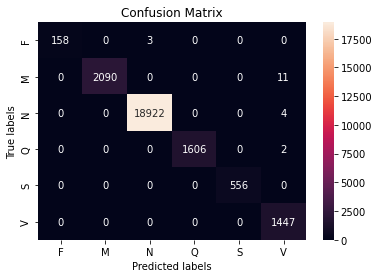

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [ ]:
print("Accuracy = ", scores[1])

In [ ]:
training_scores = model.evaluate(generator)
print("Accuracy = ", training_scores[1])

In [ ]:
validation_scores = model.evaluate(validation_generator)
print("Accuracy = ", validation_scores[1])